**Install packages**

In [31]:
# A collection of data sets to accompany the textbook
# "Using R for Introductory Statistics," second edition.
install.packages("UsingR")

# Package for ggplot2 enhancements
install.packages("ggExtra")

# Package for multivariate normal distribution
install.packages('mvtnorm')

Warning message:
"package 'UsingR' is in use and will not be installed"
Warning message:
"package 'ggExtra' is in use and will not be installed"
Warning message:
"package 'mvtnorm' is in use and will not be installed"


**Load essential libraries**

In [32]:
library(ggplot2) # library for plotting
library(dplyr) # library for data wrangling
library(UsingR) # library for data sets
library(ggExtra) # library for enhanced ggplot2 plots
library(mvtnorm) # library for multivariate normal distribution
library(dplyr) # library for data wrangling
library(tidyr) # library to reorganize data

In [33]:
# Father-Son heights (in inches) dataset
dfFatherSon = father.son
head(dfFatherSon, n = 5)
str(dfFatherSon)

,fheight,sheight
,<dbl>,<dbl>
1,65.04851,59.77827
2,63.25094,63.21404
3,64.95532,63.34242
4,65.75250,62.79238
5,61.13723,64.28113


'data.frame':	1078 obs. of  2 variables:
 $ fheight: num  65 63.3 65 65.8 61.1 ...
 $ sheight: num  59.8 63.2 63.3 62.8 64.3 ...


In [34]:
# Sample mean of father and son heights
mu = colMeans(dfFatherSon)
print('Realized Sample mean vector = ')
print(mu)
# Sample covariance matrix between father and son heights
S = cov(dfFatherSon)
print('Realized Sample covariance matrix = ')
print(S)

[1] "Realized Sample mean vector = "
 fheight  sheight 
67.68710 68.68407 
[1] "Realized Sample covariance matrix = "
         fheight  sheight
fheight 7.534303 3.873333
sheight 3.873333 7.922545


In [35]:
# Wide to long dataframe
df_gather = gather(dfFatherSon)
colnames(df_gather) = c('Variable', 'Value')
tail(df_gather)

,Variable,Value
,<chr>,<dbl>
2151,sheight,59.81693
2152,sheight,70.75232
2153,sheight,68.26774
2154,sheight,69.30589
2155,sheight,69.30199
2156,sheight,67.01500


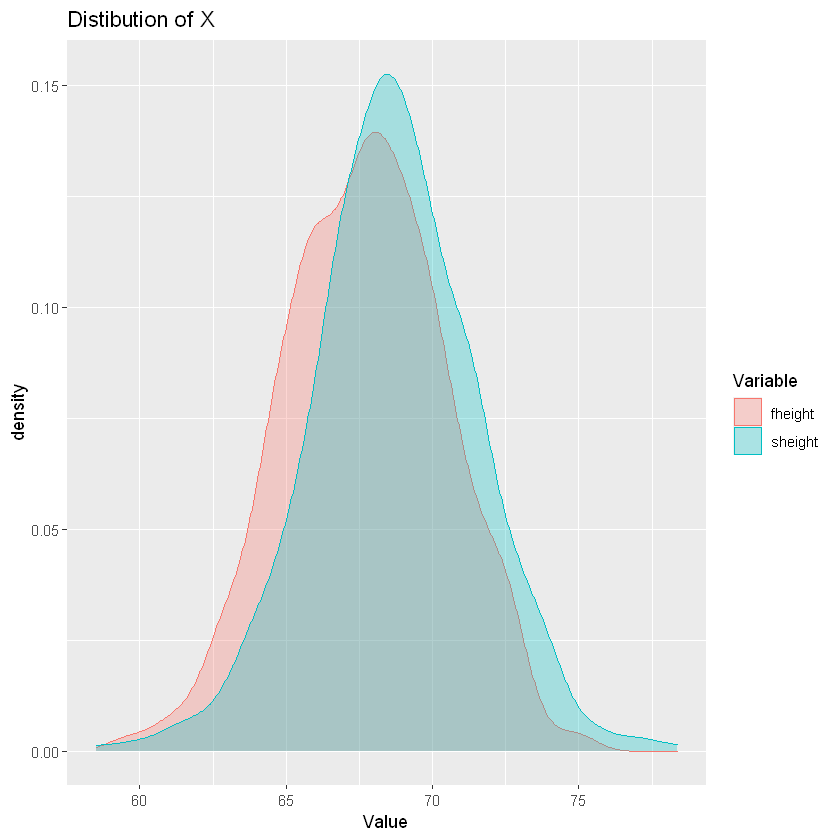

In [36]:
# Separate density plots for fathers heights and sons heights
df_gather %>% ggplot(aes(x = Value, fill = Variable, color = Variable))+
geom_density(alpha = 0.3)+ggtitle('Distibution of X')

Plot of the PDF of $X_1\sim N(\mu_F = \text{mean father height},\sigma_F = \text{std. father height})$ given by $f_{X_1}(x) = \frac{1}{\sqrt{2\pi\sigma_F^2}}e^{\frac{(x-\mu_F)^2}{2\sigma_F^2}}$ highlighting the area under the curve between $-\sigma\leq x\leq\sigma.$

Sample mean of fathers heights = 67.687097
Sample standard deviation of fathers heights = 2.744868


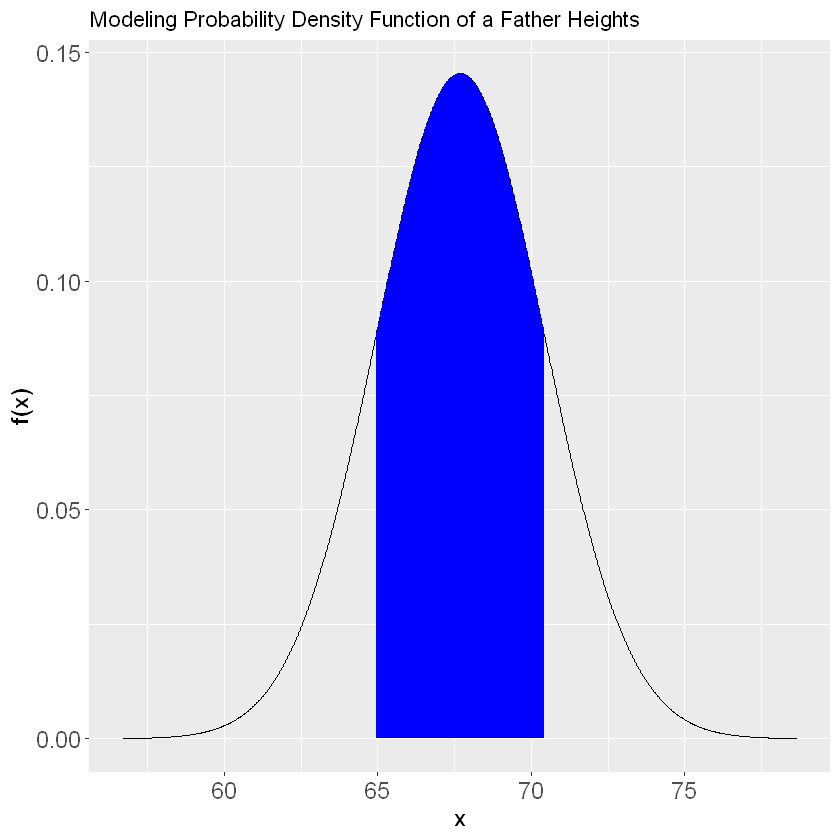

In [37]:
mu_F = mu[1]
sigma_F = sqrt(S[1,1])
cat(sprintf('Sample mean of fathers heights = %f\n', mu_F))
cat(sprintf('Sample standard deviation of fathers heights = %f\n', sigma_F))
x = seq(mu_F-4*sigma_F, mu_F+4*sigma_F, by = (8*sigma_F)/1000)
y = dnorm(x = x, mean = mu_F, sd = sigma_F)

df = data.frame(x, y)
p = ggplot(df) +
  geom_line(aes(x, y)) +
  geom_ribbon(data = df %>% filter(x >= mu_F-sigma_F & x <= mu_F+sigma_F),  aes(x = x,
                  ymin = 0, ymax = y), fill = "blue") +
  labs(x = 'x', y = 'f(x)', title = 'Modeling Probability Density Function of a Father Heights') +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p 

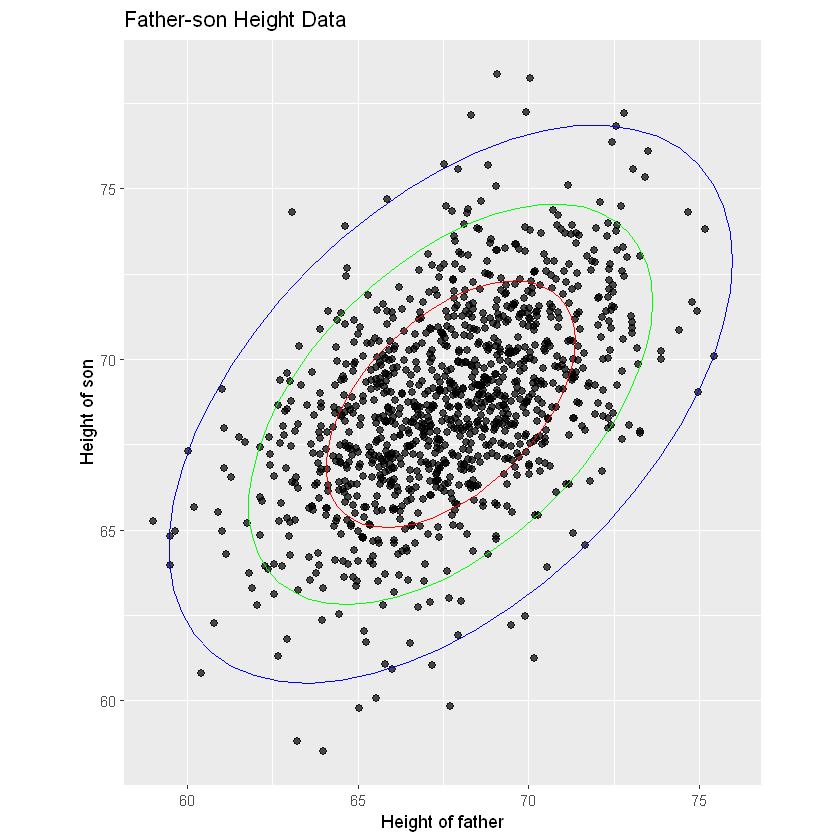

In [38]:
# Scatter plot of fathers heights vs. sons heights
p1 = ggplot(data = dfFatherSon, aes(x = fheight, y = sheight)) + 
geom_point(size = 2, alpha = 0.7) + xlab("Height of father") + 
   ylab("Height of son") + ggtitle("Father-son Height Data") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')
p1

In [39]:
# Sample covariance matrix
print('Sample covariance matrix = ')
print(S)

## Two ways of looking at the sample covariance matrix
# (1) In terms of covariance between features
((dfFatherSon$fheight - mean(dfFatherSon$fheight)) %*% (dfFatherSon$sheight - mean(dfFatherSon$sheight))) / (nrow(dfFatherSon)-1)

print("\n Hello")
# (2) In terms of samples
X = t(as.matrix(dfFatherSon))
(X - rowMeans(X)) %*% t(X - rowMeans(X)) / (nrow(dfFatherSon))

[1] "Sample covariance matrix = "
         fheight  sheight
fheight 7.534303 3.873333
sheight 3.873333 7.922545


3.873333


[1] "\n Hello"


,fheight,sheight
fheight,7.527313,3.869739
sheight,3.869739,7.915196


Sample mean of fathers heights = 67.687097
Sample standard deviation of fathers heights = 2.744868


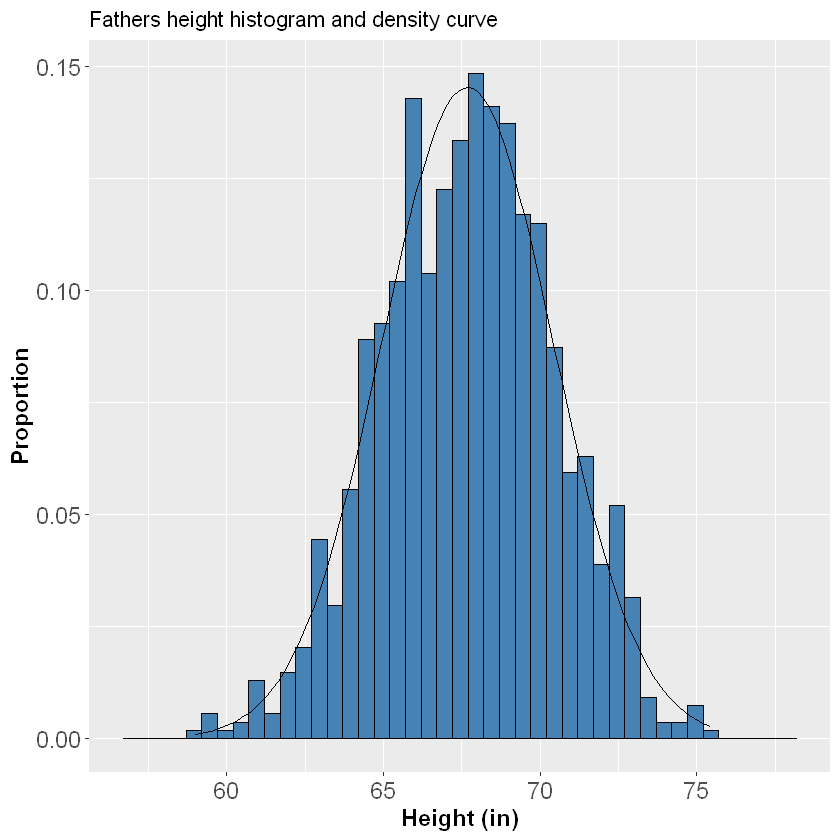

In [40]:
# Plot marginal density of father heights
# using sample father height mean standard deviation 
mu_F = mu[1]
sigma_F = sqrt(S[1,1])
cat(sprintf('Sample mean of fathers heights = %f\n', mu_F))
cat(sprintf('Sample standard deviation of fathers heights = %f\n', sigma_F))
delta = 0.5 # bin width
p2 =  ggplot(data = dfFatherSon, aes(x = fheight)) +
  geom_histogram(aes(y =..density..),
  breaks = seq(mu_F-4*sigma_F, mu_F+4*sigma_F, by = delta),
  colour = "black", fill = "steelblue") +
  stat_function(fun = dnorm, args = list(mean = mu_F, sd = sigma_F)) +
  labs(x = 'Height (in)', y = 'Proportion') + 
  ggtitle("Fathers height histogram and density curve") +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p2  

Sample mean of sons heights = 68.684070
Sample standard deviation of sons heights = 2.814702


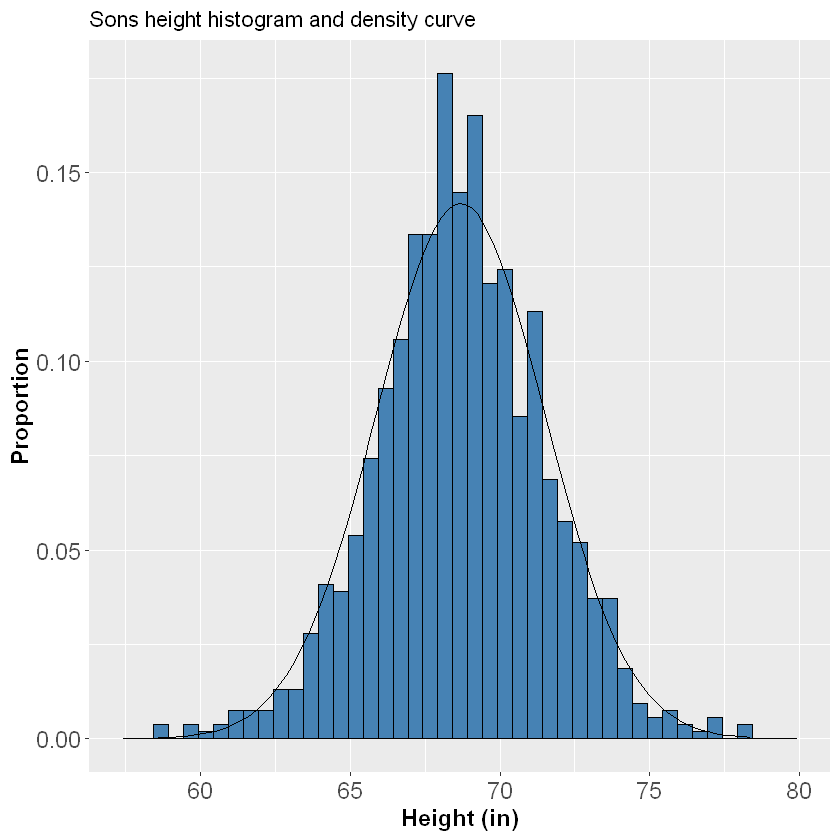

In [41]:
# Plot marginal density of son heights
# using sample son height mean standard deviation 
mu_S = mu[2]
sigma_S = sqrt(S[2,2])
cat(sprintf('Sample mean of sons heights = %f\n', mu_S))
cat(sprintf('Sample standard deviation of sons heights = %f\n', sigma_S))
delta = 0.5 # bin width
p3 =  ggplot(data = dfFatherSon, aes(x = sheight)) +
  geom_histogram(aes(y =..density..),
  breaks = seq(mu_S-4*sigma_S, mu_S+4*sigma_S, by = delta), 
  colour = "black", fill = "steelblue") +
  stat_function(fun = dnorm, args = list(mean = mu_S, sd = sigma_S)) +
  labs(x = 'Height (in)', y = 'Proportion') + 
  ggtitle("Sons height histogram and density curve") +
  theme(axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title =element_text(size = 14, face = "bold"))
p3

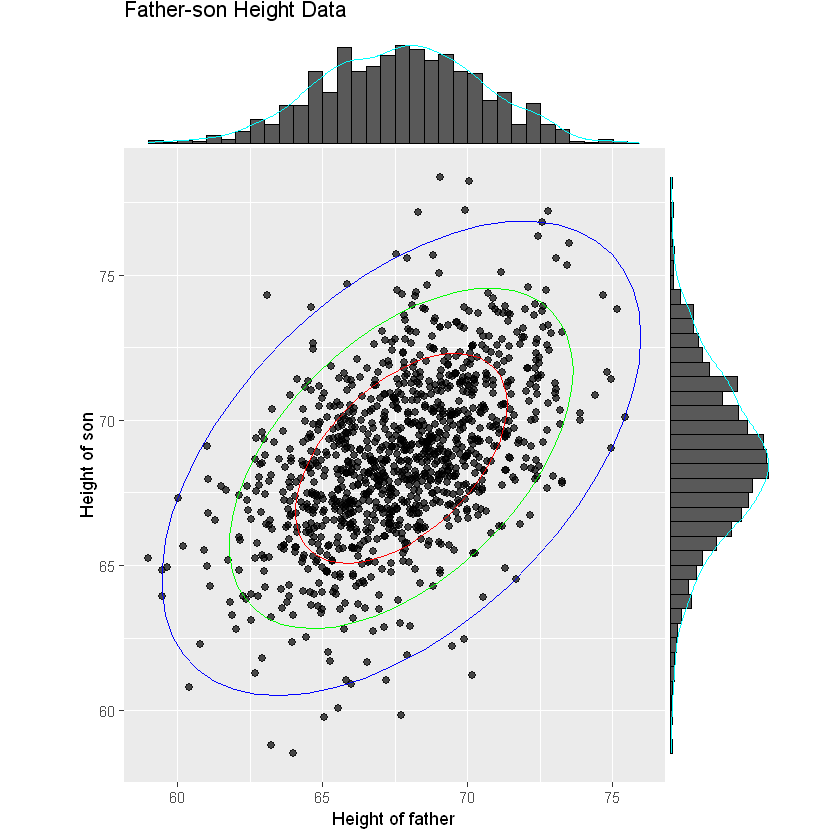

In [42]:
# Add marginal histogram plot to the scatter plot of father height vs. son height
ggMarginal(p1, type = 'histogram', color = 'black', binwidth = delta)

# Add marginal density plot to the scatter plot
ggMarginal(p1, type = 'density', color = 'cyan')

# Add marginal boxplot to the scatter plot
#ggMarginal(p1, type = "boxplot")

In [43]:
# Convert dataframe into matrix
X = as.matrix(dfFatherSon)
x10 = X[10, ] # 10th sample
x20 = X[20, ] # 20th sample
print('Sample 10:')
x10
print('Sample 20:')
x20
# Euclidean distance between samples 10 and 20
cat(sprintf('Euclidean distance between samples 10 and 20 = %f\n', norm(x10-x20, type = '2')))
# Mahalanobis distance between samples 10 and 20
M = sqrt(t(x10-x20) %*% solve(S) %*% (x10-x20))
cat(sprintf('Mahalanobis distance between samples 10 and 20 = %f\n', M))

[1] "Sample 10:"


fheight  sheight 
66.96738 63.97944

[1] "Sample 20:"


fheight  sheight 
66.75929 65.49008

Euclidean distance between samples 10 and 20 = 1.524905
Mahalanobis distance between samples 10 and 20 = 0.668516


In [44]:
# What is the probability that a randomly chosen father-son pair has
# father height between 65 in and 70 in
# and son height between 70 in and 75 in 

# Approximate probability using Monte-Carlo
p = mean((X[, 1] >= 65 & X[, 1] <= 70) & (X[, 2] >= 70 & X[, 2] <= 75))
cat(sprintf('Approximate probability using Monte-Carlo = %f\n', p))

# Approximate probability using bivariate normal distribution model
# built using sample information
p = pmvnorm(c(65, 70), c(70, 75), mean = colMeans(X), sigma = cov(X))
cat(sprintf('Approximate probability using bivariate normal distribution model built using sample information = %f\n', p))

Approximate probability using Monte-Carlo = 0.164193
Approximate probability using bivariate normal distribution model built using sample information = 0.182213


In [45]:
# What is the probability that a randomly chosen father-son pair has
# father height less than 70 in
# and son height less than 65 in 

# Approximate probability using Monte-Carlo
p = mean((X[, 1] < 70) & (X[, 2] < 65))
cat(sprintf('Approximate probability using Monte-Carlo = %f\n', p))

# Approximate probability using bivariate normal distribution model
# built using sample information
p = pmvnorm(c(-Inf, -Inf), c(70, 65), mean = colMeans(X), sigma = cov(X))
cat(sprintf('Approximate probability using bivariate normal distribution model built using sample information = %f\n', p))

Approximate probability using Monte-Carlo = 0.083488
Approximate probability using bivariate normal distribution model built using sample information = 0.092895


[1] "Mean vector = "
[1] 0 0
[1] "Covariance matrix = "
     [,1] [,2]
[1,]    8   -3
[2,]   -3    2


,X1,X2
,<dbl>,<dbl>
1,2.915244,-0.4412238
2,3.232487,-2.7173587
3,1.086934,-0.9948280
4,3.599882,-2.5124496
5,-3.313306,0.9884734


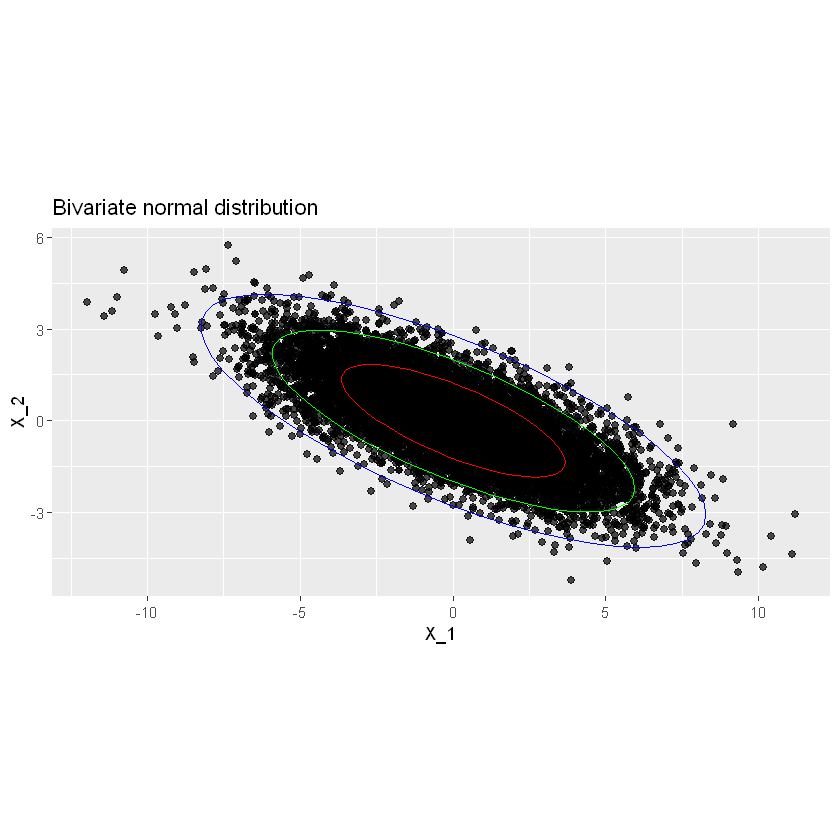

In [46]:
# Simulate a bivariate normal random variable with pre-specified
# mean and covariance matrix
mu = c(0, 0)
Sigma = matrix(c(8, -3, -3, 2), nrow = 2, ncol = 2, byrow = TRUE)
print('Mean vector = ')
print(mu)
print('Covariance matrix = ')
print(Sigma)

nsamples = 1e04
X = rmvnorm(nsamples, mean = mu, sigma = Sigma)
df = as.data.frame(X)
colnames(df) = c('X1', 'X2')
head(df, n = 5)

# Scatter plot 
p4 = ggplot(data = df, aes(x = X1, y = X2)) + 
geom_point(size=2, alpha=0.7) + xlab("X_1") + 
   ylab("X_2") + ggtitle("Bivariate normal distribution") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')
p4

In [47]:
# Calculate Mahalanobis distance from mean (father, son) pair
X = as.matrix(dfFatherSon)
#print(X)

mu = colMeans(X) # mean (father, son) sample (think as sample mean vector)
print('Mean (father, son) pair = ')
print(mu)
S = cov(X) # sample covariance matrix
print('Sample covariance matrix')
print(S)

S_inverse = solve(S)  # inverse of sample covariance matrix
print('inverse of S')
print(S_inverse)

print('S * S_inverse')
print(S %*% S_inverse)

M_distance = apply(X, 1, function(x){sqrt(t(x-mu) %*% S_inverse %*% (x-mu))})

# Add Mahalanobis distance as new column of data frame
dfFatherSon$MD = M_distance
head(dfFatherSon, n = 5)

[1] "Mean (father, son) pair = "
 fheight  sheight 
67.68710 68.68407 
[1] "Sample covariance matrix"
         fheight  sheight
fheight 7.534303 3.873333
sheight 3.873333 7.922545
[1] "inverse of S"
            fheight     sheight
fheight  0.17728515 -0.08667472
sheight -0.08667472  0.16859734
[1] "S * S_inverse"
        fheight sheight
fheight       1       0
sheight       0       1


,fheight,sheight,MD
,<dbl>,<dbl>,<dbl>
1,65.04851,59.77827,3.245427
2,63.25094,63.21404,2.080153
3,64.95532,63.34242,1.898443
4,65.75250,62.79238,2.130734
5,61.13723,64.28113,2.423821


,fheight,sheight,MD,Outliers
,<dbl>,<dbl>,<dbl>,<lgl>
1,65.04851,59.77827,3.245427,TRUE
2,63.25094,63.21404,2.080153,FALSE
3,64.95532,63.34242,1.898443,FALSE
4,65.75250,62.79238,2.130734,FALSE
5,61.13723,64.28113,2.423821,FALSE


[1] 0.9461967

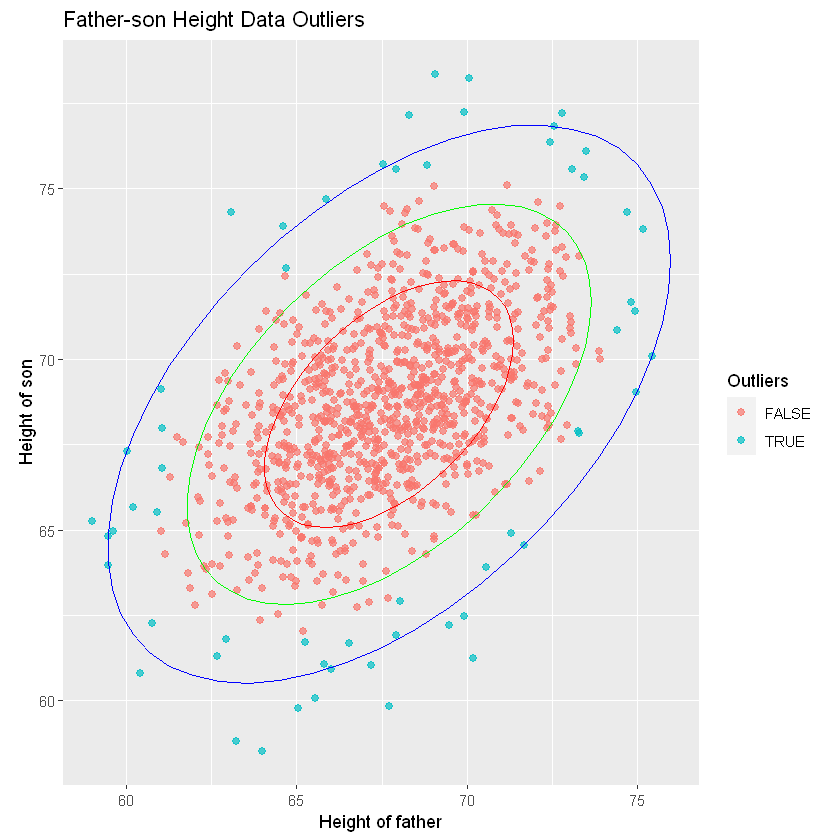

In [48]:
## Detect outliers
# Add a new column to data frame for outliers (vary threshold to see effect)
threshold = qchisq(0.95, 2)
dfFatherSon$Outliers = ((dfFatherSon$MD)^2 >= threshold)
head(dfFatherSon, n = 5)
mean(dfFatherSon$Outliers == 'FALSE')

# Plot outliers in the scatter plot
# Scatter plot of fathers heights vs. sons heights
p6 = ggplot(data = dfFatherSon, aes(x = fheight, y = sheight, color = Outliers)) + 
geom_point(size = 2, alpha = 0.7) + xlab("Height of father") + 
   ylab("Height of son") + ggtitle("Father-son Height Data Outliers") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')
p6


**Relationship between z-scores and Mahalanobis distance in 1D**

In [49]:
X = c(74, 76, 82, 80, 74 ) # heart rate vector
mu = mean(X) # sample mean
sigma = sd(X) # sample standard deviation
Z = (X-mu)/sigma # standardize heart rate vector
print('Heart rate vector')
print(X)
print('De-meaned heart rate vector')
print(X-mu)
print('Standardized heart rate vector')
print(Z)

S = cov(as.data.frame(X)) # sample covariance matrix
S_inverse = solve(S) # inverse of sample covariance matrix
M_distance = apply(as.matrix(X), 1, function(x){sqrt(t(x-mu) %*% S_inverse %*% (x-mu))})
print('Mahalanobis distance')
print(M_distance)

[1] "Heart rate vector"
[1] 74 76 82 80 74
[1] "De-meaned heart rate vector"
[1] -3.2 -1.2  4.8  2.8 -3.2
[1] "Standardized heart rate vector"
[1] -0.8807710 -0.3302891  1.3211565  0.7706746 -0.8807710
[1] "Mahalanobis distance"
[1] 0.8807710 0.3302891 1.3211565 0.7706746 0.8807710


In [50]:
mu = 68
sigma = 5
simulatedData = rnorm(10000, mu, sigma) 
mean(abs(simulatedData - mu) <= 1*sigma)

[1] 0.6858

In [51]:
# Plot the histogram for the square of the Mahalanobis distances
k = 2
# What is the probability that a randomly generated square-of-Mahalanobis-distance (in 2D)
# has a probability of 68% of being less than or equal to that value
qchisq(0.68, k)
# What is the probability that a randomly generated Mahalanobis-distance (in 2D)
# has a probability of 68% of being less than or equal to that value
sqrt(qchisq(0.68, k)) # use this as threshold for checking MD

[1] 2.278869

[1] 1.509592

[1] "Mean vector = "
[1] 0 0
[1] "Covariance matrix = "
     [,1] [,2]
[1,]    8    3
[2,]    3    2


[1] 0.683

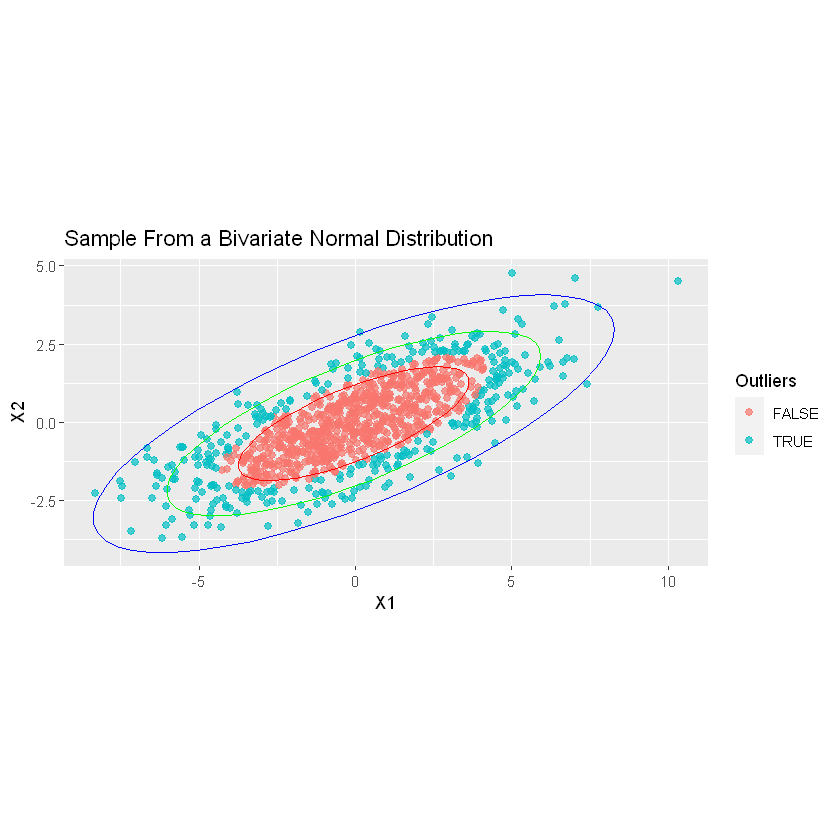

In [52]:
# Simulate a bivariate normal random variable with pre-specified
# mean and covariance matrix
mu = c(0, 0) # population mean 
Sigma = matrix(c(8, 3, 3, 2), nrow = 2, ncol = 2, byrow = TRUE) # population covariance matrix
print('Mean vector = ')
print(mu)
print('Covariance matrix = ')
print(Sigma)

nsamples = 1e03
X = rmvnorm(nsamples, mean = mu, sigma = Sigma)
df = as.data.frame(X)
colnames(df) = c('X1', 'X2')
#head(df, n = 5)

S_inverse = solve(Sigma) # inverse of population covariance matrix

# Calculate Mahalanobis distance from the mean sample
M_distance = apply(X, 1, function(x){sqrt(t(x-mu) %*% S_inverse %*% (x-mu))})

# Add Mahalanobis distance as new column of data frame
df$MD = M_distance

# Add a new column to data frame for outliers (vary threshold to see effect)
threshold = qchisq(0.68, 2) # note that the dimension is the second parameter
df$Outliers = ((df$MD)^2 >= threshold)

mean((df$MD)^2 < threshold)

# Plot outliers in the scatter plot
p7 = ggplot(data = df, aes(x = X1, y = X2, color = Outliers)) + 
geom_point(size = 2, alpha = 0.7) + xlab("X1") + 
   ylab("X2") + ggtitle("Sample From a Bivariate Normal Distribution") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')
p7
